# Contents:

This notebook contains the following topics:
- [Simple Linear Regression](#simple_linear_regression)
- [Multiple Linear Regression](#multiple_linear_regression)
- [Prediction using Regression](#prediction)
- [Factor variables in Regression](#variables)
- [Regression Diagnostics - Outliers, Influential values, Correlated errors](#diagnostics)
- [Polynomial and Spline Regression](#polynomial)

# Linear Regression

- study the relationship between two quantitative (continuous) variables
- predict the value of an outcome variable based on one or more input predictor variable(s)
- assumes that the relationship is linear
- supervised learning

The aim is to establish a linear relationship (a mathematical formula) between the predictor variable(s) and the response variable, so that, we can use this formula to estimate the value of the response (outcome ot dependent) variable $y$, when only the predictors (explanatory or independent variables) $x$ values are known.

Let's define variables: 
- observed responses, $y_i$; 
- predictor values, $x_i$; 
- predicted responses, $\widehat{y}_i$; 

The best fitted line - one which minimizes the sum of the prediction errors/residuals, i.e., minimizes $$\sum_{i=0}^n e_i = \sum_{i=0}^n (y_i - \widehat{y}_i)^2$$ when there are $n$ data points.

Given a data set of $n$ statistical units, $$\{y_{i},\,x_{i1},\ldots ,x_{ip}\}_{i=1}^{n},$$ the linear model with $p$-vector of predictors $x$ is: $$ \widehat{y}_{i}=\beta _{0}+\beta _{1}x_{i1}+\cdots +\beta _{p}x_{ip}+ e_{i} = \mathbf{x}_{i}^{\mathsf {T}}{\boldsymbol {\beta }} + e_{i},\qquad i=1,\ldots ,n,$$

where $\mathbf{x}_{i}^{\mathsf {T}} \beta$ is the inner product between vectors $\mathbf{x}_i$ and $\boldsymbol {\beta}$ and $e$ is the error variable, an unobserved random variable that adds 'noise' to the linear relationship.


In matrix notation,
$${\bf{\widehat{y}} = X} {\boldsymbol{\beta}} + {\bf{e}}$$
where,

$$ {\bf{\widehat{y}}} = \begin{pmatrix} y_1 \\ y_2 \\.\\.\\.\\ y_n \end{pmatrix},  \qquad
{\boldsymbol {\beta}} = \begin{pmatrix} \beta_0 \\ \beta_1 \\ \beta_2 \\.\\.\\.\\ \beta_p \end{pmatrix}, \qquad
{\bf{e}} = \begin{pmatrix} e_1 \\ e_2 \\.\\.\\.\\ e_n \end{pmatrix}$$

$${\bf{X}} = \begin{pmatrix} \bf{x}_1^{\mathsf{T}} \\ \bf{x}_2^{\mathsf{T}} \\.\\.\\.\\ \bf{x}_n^{\mathsf{T}} \end{pmatrix}
= \begin{pmatrix} 1 & x_{11} & \ldots & x_{1p} \\ 1 & x_{21} & \ldots & x_{2p} \\. & . & \ldots & .\\. & . & \ldots & .\\. & . & \ldots & .
\\ 1 & x_{n1} & \ldots & x_{np} \end{pmatrix}$$

<a id = 'simple_linear_regression'></a>

## Simple Linear Regression
Simple linear regression attempts to model the data in the form of the best fitting line:
$$\widehat{y}_i = \beta_0 + \beta_1 x_i + e_i \qquad i = 1,..., n$$

This is the equation of a straight line, recall $y = mx +c$, where $m$ is the slope and $c$ is the intercept.

Minimization $\rightarrow$ take derivatives of $\sum_{i=1}^n e_i$ w.r.t $\beta_0$ and $\beta_1$, set to 0 and solve for $\beta_0$ and $\beta_1$.

$$\beta_0 = \overline{y} - \beta_1 \overline{x}$$

$$\beta_1 = \frac{\sum_{i=1}^n (x_i - \overline{x} )(y_i - \overline{y} )}{\sum_{i=1}^n (x_i - \overline{x})^2}$$
where, 
- $\overline{x}$ is the mean of all of the x-values
- $\overline{y}$ is the mean of all of the y-values

$\beta_0$ tells the estimated regression equation at $x = 0$, if the 'scope of the model' includes $x = 0$, otherwise, $\beta_0$ is not meaningful.
$\beta_1$ is the amount by which the mean response may vary for every one unit increase in $x$.

<a id = 'multiple_linear_regression'></a>

## Multiple Linear Regression

Multiple linear regression is a generalized version of simple regression, where more than one independent variables are used. . The basic model for multiple linear regression is as discussed above:
$$ \widehat{y}_{i}=\beta _{0}+\beta _{1}x_{i1}+\cdots +\beta _{p}x_{ip}+ e_{i} = \mathbf{x}_{i}^{\mathsf {T}}{\boldsymbol {\beta }} + e_{i},\qquad i=1,\ldots ,n,$$

Generally, all real-world problems involve multiple predictors.

<a id = 'prediction'></a>

## Prediction Using Regression

In R, lm() function creates the relationship model between the predictor and the response variable

lm(formula,data) is the syntax for the function, where the parameters used -

- formula is a symbol presenting the relation between x and y.

- data is the vector on which the formula will be applied.


predict(object, newdata) is the syntax for predict() in linear regression, where the parameters used −

- object is the formula which is already created using the lm() function.

- newdata is the vector containing the new value for predictor variable.

### Longley’s Economic Regression Data
Description: It contains 6 economic variables observed from 1947 to 1962 which are used to predict the number of people employed yearly.

- GNP: Gross National Product.
- Unemployed: number of unemployed.
- Armed.Forces: number of people in the armed forces.
- Population: 'noninstitutionalized' population >= 14 years of age.
- Year: Year
- Employed: number of people employed.

Dimensions: 16 instances, 7 attributes

Inputs: Numeric

Output: Numeric

Optional data source: [Download Data from Kaggle](https://www.kaggle.com/ukveteran/longleys-economic-regression-data)

In [7]:
#load library (packages)
library(ggplot2)

In [8]:
# load data
data(longley)

In [9]:
# Examine structure and variable types
str(longley)

'data.frame':	16 obs. of  7 variables:
 $ GNP.deflator: num  83 88.5 88.2 89.5 96.2 ...
 $ GNP         : num  234 259 258 285 329 ...
 $ Unemployed  : num  236 232 368 335 210 ...
 $ Armed.Forces: num  159 146 162 165 310 ...
 $ Population  : num  108 109 110 111 112 ...
 $ Year        : int  1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 ...
 $ Employed    : num  60.3 61.1 60.2 61.2 63.2 ...


In this dataset, the predictors are the follwoing fields:

- GNP.deflator
- GNP
- Unemployed
- Armed.Forces
- Population
- Year

and the response variable is the field
- Employed

In [10]:
# View the first few lines of the data
head(longley)

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221
1952,98.1,346.999,193.2,359.4,113.270,1952,63.639


In [11]:
# Summarize the data set
summary(longley)

  GNP.deflator         GNP          Unemployed     Armed.Forces  
 Min.   : 83.00   Min.   :234.3   Min.   :187.0   Min.   :145.6  
 1st Qu.: 94.53   1st Qu.:317.9   1st Qu.:234.8   1st Qu.:229.8  
 Median :100.60   Median :381.4   Median :314.4   Median :271.8  
 Mean   :101.68   Mean   :387.7   Mean   :319.3   Mean   :260.7  
 3rd Qu.:111.25   3rd Qu.:454.1   3rd Qu.:384.2   3rd Qu.:306.1  
 Max.   :116.90   Max.   :554.9   Max.   :480.6   Max.   :359.4  
   Population         Year         Employed    
 Min.   :107.6   Min.   :1947   Min.   :60.17  
 1st Qu.:111.8   1st Qu.:1951   1st Qu.:62.71  
 Median :116.8   Median :1954   Median :65.50  
 Mean   :117.4   Mean   :1954   Mean   :65.32  
 3rd Qu.:122.3   3rd Qu.:1958   3rd Qu.:68.29  
 Max.   :130.1   Max.   :1962   Max.   :70.55  

### Simple Linear Regression on Longley Data

Let's assume there is one predictor, say GNP and the goal is to predict the number of people employed.

In [12]:
# getting the variables 

longley.x <- data.matrix(longley[, 2:2])
longley.y <- longley[, 'Employed']

#### Q. how to split the dataset into training and test sets

x_train = 
y_train = 

In [13]:
#longley.x

In [14]:
simple_model = lm(longley.y~longley.x, data = longley)

In [15]:
print(summary(simple_model))


Call:
lm(formula = longley.y ~ longley.x, data = longley)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.77958 -0.55440 -0.00944  0.34361  1.44594 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 51.843590   0.681372   76.09  < 2e-16 ***
longley.x    0.034752   0.001706   20.37 8.36e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6566 on 14 degrees of freedom
Multiple R-squared:  0.9674,	Adjusted R-squared:  0.965 
F-statistic: 415.1 on 1 and 14 DF,  p-value: 8.363e-12



R-squared value: 0.9674 shows how close the data is to the simple linear regression model.

F statistic tells if there is a relationship between the dependent and independent variables being tested. Generally, a large F indicates a stronger relationship.

p-value is associated with the F statistic, and is used to interpret the significance for the whole model fit to the data.

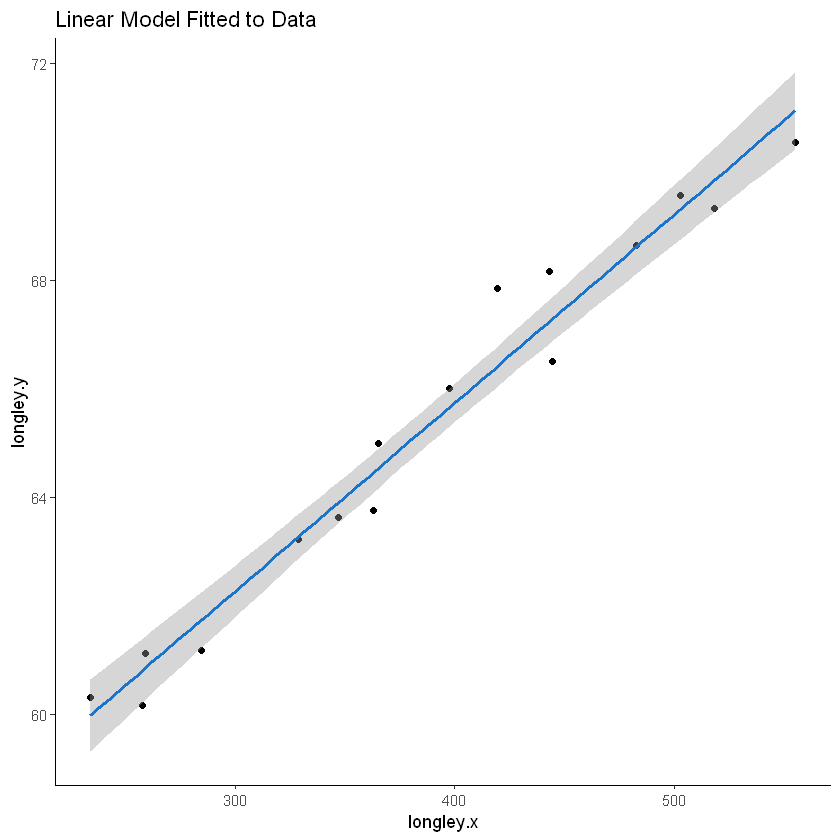

In [16]:
ggplot(data = longley, aes(x = longley.x, y = longley.y)) +
geom_point() +
stat_smooth(method = 'lm', col = 'dodgerblue3') +
theme(panel.background = element_rect(fill = 'white'),
axis.line.x=element_line(),
axis.line.y=element_line()) +
ggtitle('Linear Model Fitted to Data')

The gray shading around the line represents a confidence interval of 0.95, the default for the stat_smooth() function, which smoothes data to make patterns easier to visualize. This 0.95 confidence interval is the probability that the true linear model for the GNP and number of people employed will lie within the confidence interval of the regression model fitted to the data. There is still variability within the observations, even though the model fits the data well.

#### Can the following histogram be made as a boxplot to show the residuals? Or a better way to represent the residuals?

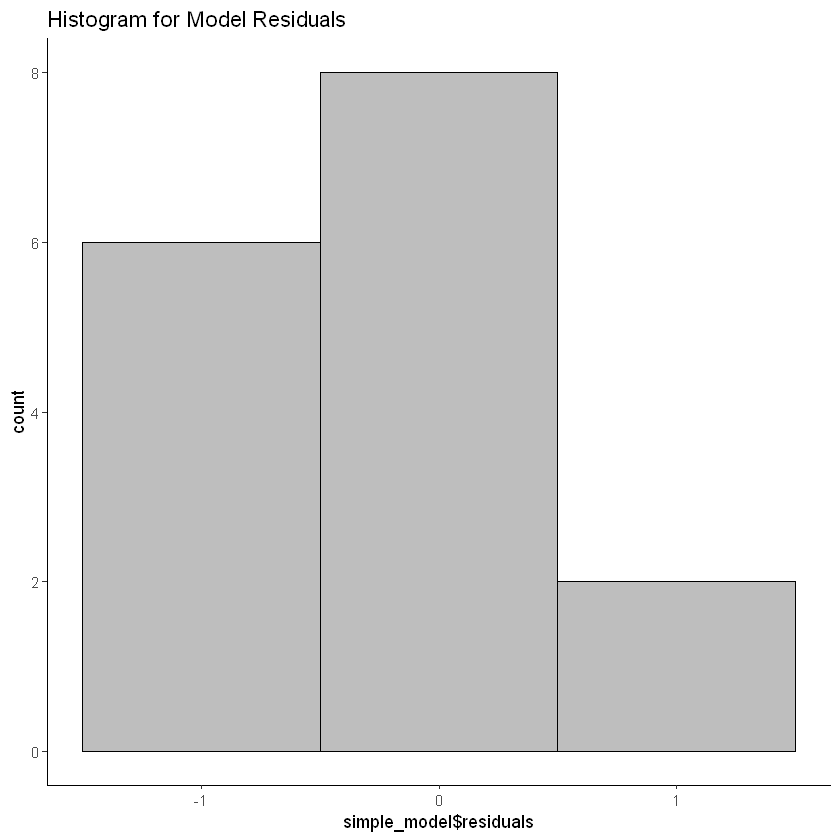

In [17]:
ggplot(data = longley, aes(simple_model$residuals)) +
geom_histogram(binwidth = 1, color = 'black', fill = 'grey') +
theme(panel.background = element_rect(fill = 'white'),
axis.line.x=element_line(),
axis.line.y=element_line()) +
ggtitle('Histogram for Model Residuals')

In [24]:
# Q. how to generate random integers in a range?
# Q. is there a better way to present the output, instead of the one below?

new_data = data.frame(sample.int(300, 16))

print(predict(simple_model, new_data))

       1        2        3        4        5        6        7        8 
59.98567 60.85924 60.81156 61.73406 63.27623 63.90260 64.54156 64.46256 
       9       10       11       12       13       14       15       16 
65.65655 66.41106 67.23083 67.29258 68.61866 69.31013 69.85129 71.12743 


### Multiple Linear Regression on Longley Data

Let's use the entire set of predictors to predict the number of people employed.

In [25]:
# getting the variables 

longley.x <- data.matrix(longley[, 1:6])
longley.y <- longley[, 'Employed']

In [27]:
multiple_model = lm(longley.y~longley.x, data = longley)
print(summary(multiple_model))


Call:
lm(formula = longley.y ~ longley.x, data = longley)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.41011 -0.15767 -0.02816  0.10155  0.45539 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -3.482e+03  8.904e+02  -3.911 0.003560 ** 
longley.xGNP.deflator  1.506e-02  8.492e-02   0.177 0.863141    
longley.xGNP          -3.582e-02  3.349e-02  -1.070 0.312681    
longley.xUnemployed   -2.020e-02  4.884e-03  -4.136 0.002535 ** 
longley.xArmed.Forces -1.033e-02  2.143e-03  -4.822 0.000944 ***
longley.xPopulation   -5.110e-02  2.261e-01  -0.226 0.826212    
longley.xYear          1.829e+00  4.555e-01   4.016 0.003037 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3049 on 9 degrees of freedom
Multiple R-squared:  0.9955,	Adjusted R-squared:  0.9925 
F-statistic: 330.3 on 6 and 9 DF,  p-value: 4.984e-10



#### Q. add section for prediction?

#### Q. How can this result be visually represented?

<a id = 'variables'></a>

## Factor variables

<a id = 'diagnostics'></a>

## Regression Diagnostics - Outliers, Influential values, Correlated errors

**Outliers**:
- an observation which has a response value that is very different from the predicted value based on a model.
- Q. what else?

**Influential values**:
- a data point which unduly influences any part of a regression analysis, such as the predicted responses, the estimated slope coefficients, or the hypothesis test results. 
- linear regression model is sensitive to outliers and high-leverage points (data points which have extreme predictor values)
- methods to identify influential values:
    1. Difference in Fits (DFFITS)
    2. Cook's Distances
  In both methods, the following idea is used.
  
  Delete the observations one at a time, refit the regression model on the remaining $n–1$ observations each time. Then, compare the results using all $n$ observations to the results with the $i$-th observation deleted to see how much influence the observation has on the analysis. This enables to assess the potential impact each data point has on the regression analysis.

**Correlated errors**:
- Q. what can be put here?
- Q. multi-collenearity?


**Assumptions of Linear Regression**:
- mean of the response at each value of the predictor, $x_i$, is a *linear* function of the $x_i$.
- errors/residuals, $e_i$, are *independent*.
- errors, $e_i$, at each value of $x_i$, are *normally distributed*.
- errors, $e_i$, at each value of $x_i$, have *equal variances*.
- homoscedasticity, i.e., variance of the residuals/errors must be *constant*.
- residuals should be multivariate *normally distributed*.

<a id = 'polynomial'></a>

## Polynomial and Spline Regression

Polynomial Regression fits a non-linear regression model between the dependent variable $y$ and the independent variable $x$. Such a model with a single predictor is
$$ \widehat{y}_{i} = \beta _{0} + \beta _{1} \mathbf{X} + \beta _{2} \mathbf{X}^2 +\cdots +\beta _{h} \mathbf{X}^h+ e_{i} + e_{i},$$

where $h$ is called the degree of the polynomial, i.e., $h = 2$ is quadratic, $h = 3$ is cubic, $h = 4$ is quartic, etc. Although there is a- nonlinear relationship between $y$ and $x$, polynomial regression is still considered linear regression since it is linear in the regression coefficients, i.e., the $\boldsymbol{\beta}$s.

## Additional

Q. How to check if the data is normally distributed?

Q. How to check for linear independence of the data?

Generalized Linear Model


## References:
1. [Penn State STAT 462 Applied Regression Analysis](https://online.stat.psu.edu/stat462/node/77/)
2. [Khan Academy](https://www.khanacademy.org/math/ap-statistics/bivariate-data-ap/assessing-fit-least-squares-regression/v/influential-points-regression)